In [56]:
import pandas as pd
#pd.options.display.max_columns = None
import numpy as np 
import matplotlib.pyplot as plt 
#import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture

In [5]:
df = pd.read_csv('FIFA_18.csv', encoding='cp1252')
df.head()

,No,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,$565,...,75,96,33,28,26,6,11,15,14,8
1,1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,$405,...,85,95,28,31,23,7,11,15,14,11
2,2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,$290,...,81,94,27,24,33,9,9,15,15,11
3,3,193080,De Gea,27,Spain,91,93,Manchester United,€72M,$260,...,40,68,15,21,13,90,85,87,88,94
4,4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,€102M,$355,...,79,88,68,58,51,15,13,5,10,13


In [60]:
features_to_cluster = ['Age', 'Potential', 'Finishing', 'Reactions', 'Dribbling', 'BallControl', 'LongShots', 'Volleys', 'Vision']

In [78]:
cluster_df = df.loc[:,features_to_cluster]
scaler = StandardScaler()
cluster_df_std = scaler.fit_transform(cluster_df)
#cluster_df_std['Name'] = df['Name']
#cluster_df_std.head()
cluster_df_std.shape

(501, 9)

In [80]:
cluster_df_std = pd.DataFrame(data=cluster_df_std, columns=features_to_cluster)

In [82]:
cluster_df_std['Name'] = df['Name']
cluster_df_std.head()

,Age,Potential,Finishing,Reactions,Dribbling,BallControl,LongShots,Volleys,Vision,Name
0,1.049136,2.848972,1.511092,3.427809,1.218807,1.137419,1.370243,1.212505,1.694932,L. Messi
1,1.601255,2.848972,1.468458,3.667159,0.810879,1.035011,1.326481,1.256946,0.803736,Cristiano Ronaldo
2,-0.331161,2.538884,1.170018,3.188460,1.173482,1.086215,0.845101,1.123623,1.175068,Neymar Jr
3,-0.055102,2.538884,-1.984920,2.231062,-2.361891,-1.627585,-2.218227,-2.031693,-0.235992,De Gea
4,-0.055102,2.228796,0.956846,2.470411,0.720229,0.881400,1.238958,1.034741,1.694932,K. De Bruyne


In [84]:
k=5
chosen_feature1, chosen_feature2 = 'Age', 'Potential'
kmeans = KMeans(n_clusters=k, random_state=0)
y_pred = kmeans.fit_predict(cluster_df_std.loc[:,[chosen_feature1, chosen_feature2]])

In [85]:
kmeans.cluster_centers_

array([[ 1.00666561,  1.08385563],
       [ 0.03256585, -0.80922796],
       [-0.7441097 ,  0.22988175],
       [-1.08464124,  1.50647321],
       [ 1.27918588, -0.72565321]])

In [86]:
kmeans.labels_

array([0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 3, 3, 3, 3, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 4, 1, 1, 0, 1, 1, 1, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 4, 4, 2,
       1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 3, 1, 1, 1, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 1, 2, 2, 1,
       3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 4, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 4, 1, 1, 2, 1, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 4, 4, 4, 2, 2, 2, 3, 2, 3, 3, 1, 2,
       1, 2, 3, 2, 2, 3, 3, 3, 2, 4, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 4, 1, 2,
       4, 1, 4, 1, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4,

In [23]:
features_to_cluster = features_to_cluster[1:]
features_to_cluster

['Potential',
 'Finishing',
 'Reactions',
 'Dribbling',
 'BallControl',
 'LongShots',
 'Volleys',
 'Vision']

In [34]:
cluster_df.head()

,Potential,Finishing,Reactions,Dribbling,BallControl,LongShots,Volleys,Vision,Name
0,94,95,95,97,96,94,86,94,L. Messi
1,94,94,96,88,94,93,87,82,Cristiano Ronaldo
2,93,87,94,96,95,82,84,87,Neymar Jr
3,93,13,90,18,42,12,13,68,De Gea
4,92,82,91,86,91,91,82,94,K. De Bruyne


In [119]:
df_chosen = cluster_df_std[[chosen_feature1, chosen_feature2, 'Name']]
df_chosen.head()

,Age,Potential,Name
0,1.049136,2.848972,L. Messi
1,1.601255,2.848972,Cristiano Ronaldo
2,-0.331161,2.538884,Neymar Jr
3,-0.055102,2.538884,De Gea
4,-0.055102,2.228796,K. De Bruyne


In [120]:
kmeans.predict(df_chosen.drop('Name', axis=1))

array([0, 0, 3, 3, 3, 3, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 0, 0,
       0, 0, 0, 3, 3, 3, 3, 2, 3, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3,
       3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 2, 2, 3, 2, 3, 3, 2, 2,
       2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 4, 1, 1, 0, 1, 1, 1, 4, 1, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 4, 4, 2,
       1, 1, 1, 1, 1, 4, 4, 4, 1, 1, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 3, 3, 1, 1, 1, 3, 3, 3, 3, 2, 3, 3, 2, 2, 3, 2, 2, 1, 2, 2, 1,
       3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 4, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 4, 4, 1, 1, 2, 1, 4, 1, 4, 1, 4, 4, 4, 1, 1, 1, 4, 4, 4,
       4, 4, 4, 4, 4, 2, 3, 2, 3, 3, 4, 4, 4, 2, 2, 2, 3, 2, 3, 3, 1, 2,
       1, 2, 3, 2, 2, 3, 3, 3, 2, 4, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 2, 2,
       1, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 4, 1, 2,
       4, 1, 4, 1, 1, 4, 1, 4, 1, 4, 1, 4, 4, 1, 4,

In [123]:
cluster_df_std.head()

,Age,Potential,Finishing,Reactions,Dribbling,BallControl,LongShots,Volleys,Vision,Name
0,1.049136,2.848972,1.511092,3.427809,1.218807,1.137419,1.370243,1.212505,1.694932,L. Messi
1,1.601255,2.848972,1.468458,3.667159,0.810879,1.035011,1.326481,1.256946,0.803736,Cristiano Ronaldo
2,-0.331161,2.538884,1.170018,3.188460,1.173482,1.086215,0.845101,1.123623,1.175068,Neymar Jr
3,-0.055102,2.538884,-1.984920,2.231062,-2.361891,-1.627585,-2.218227,-2.031693,-0.235992,De Gea
4,-0.055102,2.228796,0.956846,2.470411,0.720229,0.881400,1.238958,1.034741,1.694932,K. De Bruyne


In [130]:
mins = df_chosen.drop('Name', axis=1).min(axis=0) - 0.1
maxs = df_chosen.drop('Name', axis=1).max(axis=0) + 0.1
xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], 1000),
                         np.linspace(mins[1], maxs[1], 1000))
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
Z[0]

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [137]:
df_chosen.loc[:,chosen_feature1]

0      1.049136
1      1.601255
2     -0.331161
3     -0.055102
4     -0.055102
         ...   
496   -0.331161
497   -0.055102
498    0.220958
499   -0.055102
500    1.049136
Name: Age, Length: 501, dtype: float64

In [151]:
cluster_df_std.head()

,Age,Potential,Finishing,Reactions,Dribbling,BallControl,LongShots,Volleys,Vision,Name
0,1.049136,2.848972,1.511092,3.427809,1.218807,1.137419,1.370243,1.212505,1.694932,L. Messi
1,1.601255,2.848972,1.468458,3.667159,0.810879,1.035011,1.326481,1.256946,0.803736,Cristiano Ronaldo
2,-0.331161,2.538884,1.170018,3.188460,1.173482,1.086215,0.845101,1.123623,1.175068,Neymar Jr
3,-0.055102,2.538884,-1.984920,2.231062,-2.361891,-1.627585,-2.218227,-2.031693,-0.235992,De Gea
4,-0.055102,2.228796,0.956846,2.470411,0.720229,0.881400,1.238958,1.034741,1.694932,K. De Bruyne


In [177]:
def plot_data(df_chosen):
    plt.plot(df_chosen.loc[:,chosen_feature1], df_chosen.loc[:,chosen_feature2], 'k.', markersize=10)

def plot_centroids(centroids, circle_color='seagreen', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1], s=30, linewidths=8,
                color=circle_color, zorder=10, alpha=0.5)
    #plt.scatter(centroids[:, 0], centroids[:, 1], s=50, linewidths=50,
     #           color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, df_chosen, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True, player=None):
    mins = df_chosen[[chosen_feature1, chosen_feature2]].min(axis=0) - 0.1
    maxs = df_chosen[[chosen_feature1, chosen_feature2]].max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="viridis", alpha=0.7)
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    
    
    plot_data(df_chosen)


    if player:
        plt.scatter(df_chosen.loc[df_chosen['Name'] == player, chosen_feature1], df_chosen.loc[df_chosen['Name'] == player, chosen_feature2], color='red', s=600, marker='*', edgecolors='k', linewidths=3)

    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel(f"{chosen_feature1}", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel(f"{chosen_feature2}", fontsize=14, rotation=90)
    else:
        plt.tick_params(labelleft=False)

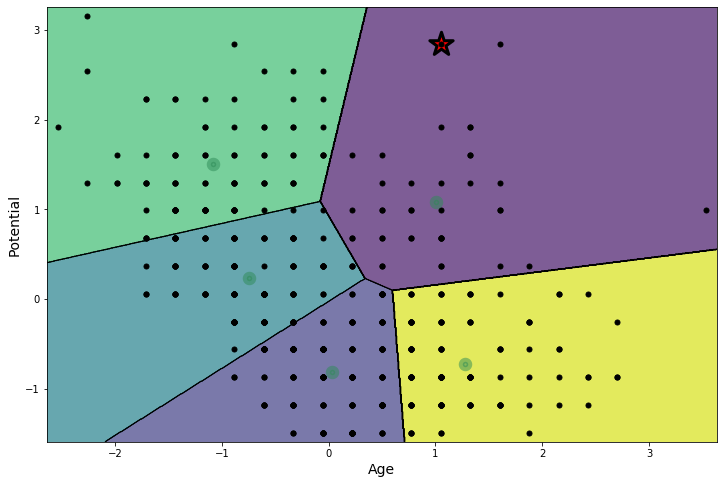

In [180]:
plt.figure(figsize=(12, 8))
plot_decision_boundaries(kmeans, cluster_df_std, player='L. Messi')
plt.show()

In [181]:
cluster_df_std['cluster'] = kmeans.labels_

In [182]:
cluster_df_std.head()

,Age,Potential,Finishing,Reactions,Dribbling,BallControl,LongShots,Volleys,Vision,Name,cluster
0,1.049136,2.848972,1.511092,3.427809,1.218807,1.137419,1.370243,1.212505,1.694932,L. Messi,0
1,1.601255,2.848972,1.468458,3.667159,0.810879,1.035011,1.326481,1.256946,0.803736,Cristiano Ronaldo,0
2,-0.331161,2.538884,1.170018,3.188460,1.173482,1.086215,0.845101,1.123623,1.175068,Neymar Jr,3
3,-0.055102,2.538884,-1.984920,2.231062,-2.361891,-1.627585,-2.218227,-2.031693,-0.235992,De Gea,3
4,-0.055102,2.228796,0.956846,2.470411,0.720229,0.881400,1.238958,1.034741,1.694932,K. De Bruyne,3


In [193]:
chosen_player_cluster = cluster_df_std.loc[cluster_df_std['Name'] == 'L. Messi']['cluster']
chosen_player_set = cluster_df_std.loc[cluster_df_std['cluster'] == chosen_player_cluster[0]]

In [194]:
chosen_player_set.head()

,Age,Potential,Finishing,Reactions,Dribbling,BallControl,LongShots,Volleys,Vision,Name,cluster
0,1.049136,2.848972,1.511092,3.427809,1.218807,1.137419,1.370243,1.212505,1.694932,L. Messi,0
1,1.601255,2.848972,1.468458,3.667159,0.810879,1.035011,1.326481,1.256946,0.803736,Cristiano Ronaldo,0
6,1.325196,1.918708,0.530503,2.231062,0.901530,0.983807,0.845101,0.768094,1.546399,L. Modri?,0
7,1.049136,1.918708,1.425824,2.709761,0.765554,0.830196,0.976387,1.301387,0.952269,L. Suárez,0
8,1.325196,1.918708,0.018892,1.034315,-0.322253,0.522973,-0.161421,0.323684,-0.607323,Sergio Ramos,0
